# Exercise - Unconstrained Optimization

### Data

All the analysis below applies to the data set,

- `data/spx_weekly_returns.xlsx`

- The file has **weekly** returns.

- For annualization, use 52 periods per year.

Consider only the following 10 stocks…

As well as the ETF,

### Data Processing

In [2]:
import sys
sys.path.append('..')

import pandas as pd

from utils import *

In [12]:
data = pd.read_excel("../data/spx_returns_weekly.xlsx", sheet_name = "s&p500 rets").set_index("date").dropna()
benchmark = pd.read_excel("../data/spx_returns_weekly.xlsx", sheet_name = "benchmark rets").set_index("date").dropna()
tickers = ["AAPL", "NVDA", "MSFT", "GOOGL", "AMZN",  "META", "TSLA", "AVGO", "BRK/B", "LLY"]
data = data[tickers]
data.head()

,AAPL,NVDA,MSFT,GOOGL,AMZN,META,TSLA,AVGO,BRK/B,LLY
date,,,,,,,,,,
2015-01-09,0.024514,-0.009315,0.009195,-0.054445,-0.037534,-0.009055,-0.057685,0.047971,0.002011,-0.001855
2015-01-16,-0.053745,0.000836,-0.020131,0.019448,-0.020880,-0.032931,-0.065760,-0.010268,-0.001739,0.010726
2015-01-23,0.065950,0.037578,0.020329,0.061685,0.074431,0.035255,0.042575,0.030500,-0.000603,0.020514
2015-01-30,0.036997,-0.072636,-0.143706,-0.008130,0.134900,-0.024669,0.011476,-0.038331,-0.034938,-0.001802
2015-02-06,0.019114,0.062269,0.049753,-0.006812,0.055737,-0.018967,0.067589,0.018037,0.043569,-0.022778


## 1. Risk Statistics

### 1.1.

Display a table with the following metrics for each of the return series.

- mean (annualized)

- volatility (annualized)

- Sharpe ratio (annualized)

- skewness

- kurtosis

- maximum drawdown

In [ ]:
mean, std, sharpe = Calc_MeanStdSharpe_Stock(data, 52)
skew, kurt = Calc_SkewKurt(data)
max_drawdown, drawdown = Calc_MaxDrawdown(data)

result = pd.DataFrame({
    "Mean": mean,
    "Std": std,
    "Sharpe": sharpe,
    "Skew": skew,
    "Kurt": kurt,
    "Max Drawdown": max_drawdown
}, index = tickers)

result

,Mean,Std,Sharpe,Skew,Kurt,Max Drawdown
AAPL,0.238714,0.276629,0.862938,-0.218583,1.825875,-0.346408
NVDA,0.645580,0.463283,1.393490,0.344741,1.389069,-0.659362
MSFT,0.261402,0.239980,1.089266,0.072148,2.341547,-0.350539
GOOGL,0.216800,0.279851,0.774698,0.582916,3.720739,-0.418640
AMZN,0.293447,0.306000,0.958976,0.063289,1.781508,-0.548307
META,0.261924,0.351336,0.745509,0.052425,4.023529,-0.760252
TSLA,0.469754,0.586431,0.801039,0.547533,1.594181,-0.722459
AVGO,0.394854,0.375132,1.052574,0.662112,3.503558,-0.400357
BRK/B,0.135025,0.190654,0.708223,-0.200855,2.513168,-0.264770
LLY,0.281542,0.282980,0.994919,0.216020,1.683187,-0.252524


### Note

We have total returns, and Sharpe ratio is technically defined for excess returns. Don’t worry about the difference. (Or subtract SHV if you prefer.)

### 1.2.

As a standalone investment, which is most attractive? And least? Justify your answer.
- `NVDA` has the highest mean return and Sharpe with significant volatility

### 1.3.

For each investment, estimate a regression against `SPY`. Report the

- alpha (annualized as a mean)

- beta

- info ratio

- r-squared

Based on this table, which investment seems most attractive relative to holding `SPY`?

In [ ]:
beta, treynor_ratio, info_ratio, rsquared, tracking_error, alpha = list(), list(), list(), list(), list(), list()

for ticker in tickers:
    y = benchmark["SPY"]
    x = data[ticker]
    Beta, Treynor_Ratio, Information_Ratio, Rsquared, Tracking_Error, Model = Calc_Beta_TreynorRatio_InfoRatio_RSquared_TrackingError(y, x, 52)
    beta.append(Beta)
    treynor_ratio.append(Treynor_Ratio)
    info_ratio.append(Information_Ratio)
    rsquared.append(Rsquared)
    tracking_error.append(Tracking_Error)
    alpha.append(Model.params['const'] * 52)  # annualized

result2 = pd.DataFrame({
    "Alpha": alpha,
    "Beta": beta,
    "Treynor Ratio": treynor_ratio,
    "Information Ratio": info_ratio,
    "R squared": rsquared,
}, index = tickers)
result2

,Alpha,Beta,Treynor Ratio,Information Ratio,R squared
AAPL,0.029866,0.424769,0.309025,0.240733,0.472864
NVDA,-0.021148,0.236087,0.556001,-0.161086,0.409703
MSFT,-0.005450,0.523003,0.250982,-0.046997,0.539501
GOOGL,0.045080,0.397528,0.330202,0.347569,0.423861
AMZN,0.033692,0.332505,0.394775,0.245421,0.354546
META,0.060133,0.271574,0.483346,0.424195,0.311786
TSLA,0.060982,0.149615,0.877346,0.415887,0.263646
AVGO,0.020086,0.281568,0.466191,0.149539,0.382092
BRK/B,0.042644,0.656325,0.199999,0.366463,0.536244
LLY,0.066943,0.228461,0.574560,0.423222,0.143143


- `TSLA` and `LLY` have the highest alpha relative to `SPY`

---

## 2. Portfolio Allocation

### 2.1

Display the correlation matrix of the returns.

- Based on this information, which investment do you anticipate will get extra weight in the portfolio, beyond what it would merit for its mean return?

- Report the maximally correlated assets and the minimally correlated assets.

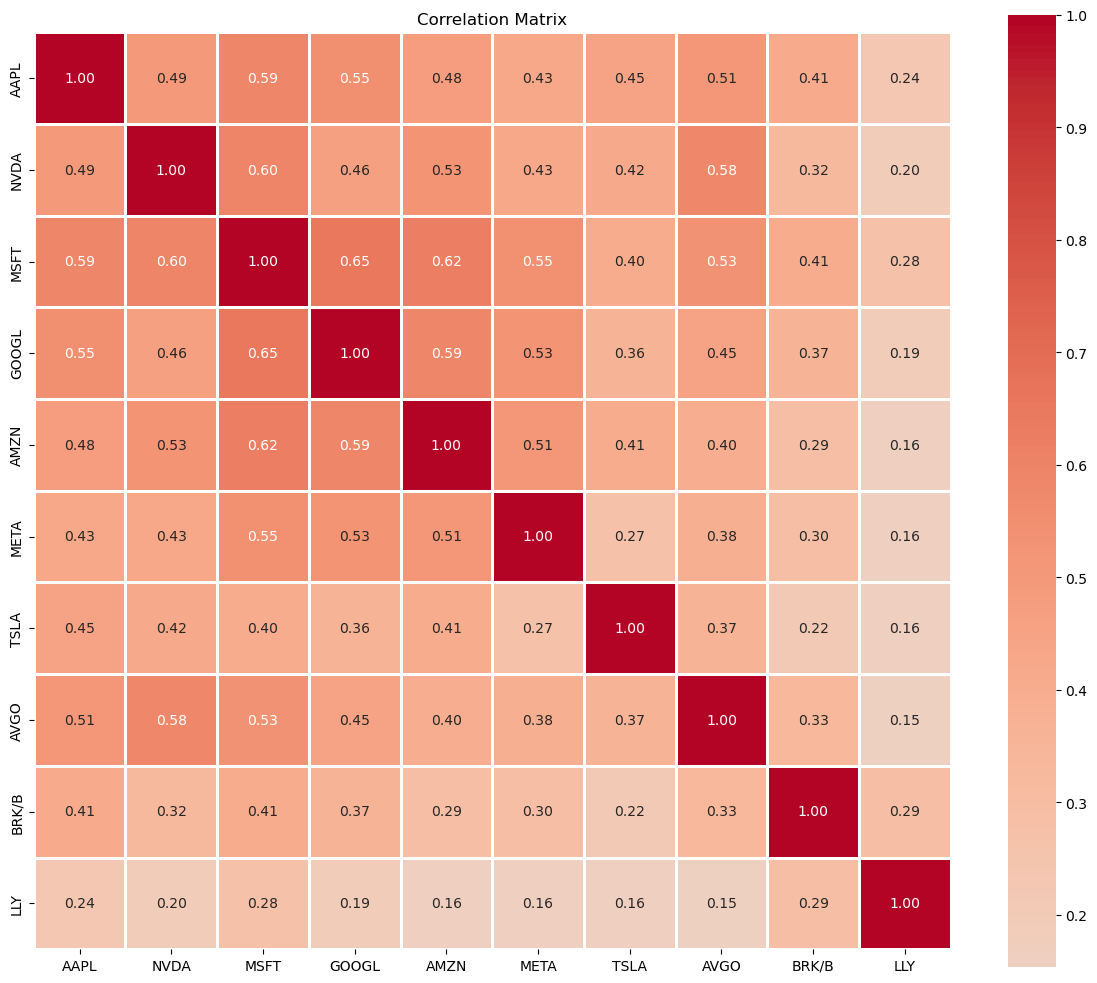

In [14]:
Plot_CorrHeatmap(data)

In [16]:
data.corr().sum().sort_values()

LLY      2.828185
BRK/B    3.939105
TSLA     4.066880
META     4.560520
AVGO     4.707340
AMZN     4.994540
NVDA     5.027023
GOOGL    5.152797
AAPL     5.153659
MSFT     5.620679
dtype: float64

- Max Correlated Asset: `MSFT`

- Lease Correlated Asset: `LLY`

### 2.2

Calculate the weights of the mean-variance optimized portfolio, also called the tangency portfolio.

- Display a table indexed by each investment, with the optimal weights in one column and the Sharpe ratios in another column.

- Do the investments with the best Sharpe ratios tend to get the biggest weights?

In [30]:
allAssets = pd.concat([data, benchmark["SPY"]], axis=1)
allAssets.head()

,AAPL,NVDA,MSFT,GOOGL,AMZN,META,TSLA,AVGO,BRK/B,LLY,SPY
date,,,,,,,,,,,
2015-01-09,0.024514,-0.009315,0.009195,-0.054445,-0.037534,-0.009055,-0.057685,0.047971,0.002011,-0.001855,-0.005744
2015-01-16,-0.053745,0.000836,-0.020131,0.019448,-0.020880,-0.032931,-0.065760,-0.010268,-0.001739,0.010726,-0.012827
2015-01-23,0.065950,0.037578,0.020329,0.061685,0.074431,0.035255,0.042575,0.030500,-0.000603,0.020514,0.016565
2015-01-30,0.036997,-0.072636,-0.143706,-0.008130,0.134900,-0.024669,0.011476,-0.038331,-0.034938,-0.001802,-0.026931
2015-02-06,0.019114,0.062269,0.049753,-0.006812,0.055737,-0.018967,0.067589,0.018037,0.043569,-0.022778,0.030584


In [31]:
mean, std, sharpe = Calc_MeanStdSharpe_Stock(allAssets, 52)
weights = Calc_TangencyWeights(allAssets, 52)

result3 = pd.DataFrame({
    "Weights": weights,
    "Sharpe": sharpe
}, index = tickers + ["SPY"])
result3

,Weights,Sharpe
AAPL,0.409367,0.862938
NVDA,0.882896,1.393490
MSFT,0.848584,1.089266
GOOGL,0.193126,0.774698
AMZN,0.426356,0.958976
META,0.277408,0.745509
TSLA,0.310150,0.801039
AVGO,0.601896,1.052574
BRK/B,2.580474,0.708223
LLY,1.112630,0.994919


- `BRK/B` has the highest weight with the lowest sharpe

### 2.3.

Report the following performance statistics of the portfolio achieved with the optimized weights calculated above.

- mean

- volatility

- Sharpe

(Annualize all three statistics.)

In [32]:
mean_p, std_p, sharpe_p = Calc_MeanStdSharpe_Portfolio(allAssets, weights, 52)
print(f"Mean: {mean_p:.4f}, Volatility: {std_p:.4f}, Sharpe: {sharpe_p:.4f}")

Mean: 1.3022, Volatility: 0.6295, Sharpe: 2.0685


### 2.4.

Try dropping the asset which had the biggest short position from the investment set. Re-run the optimization. What do you think of these new weights compared to the original optimized weights?

What is going on?

In [36]:
weights_2 = Calc_TangencyWeights(data, 52)
mean_p2, std_p2, sharpe_p2 = Calc_MeanStdSharpe_Portfolio(data, weights_2, 52)
print(f"Mean: {mean_p2:.4f}, Volatility: {std_p2:.4f}, Sharpe: {sharpe_p2:.4f}")

result4 = pd.DataFrame({
    "Weights": weights_2,
    "Sharpe": sharpe[:-1]
}, index = tickers)
result4

Mean: 0.4238, Volatility: 0.2622, Sharpe: 1.6163


,Weights,Sharpe
AAPL,-0.054492,0.862938
NVDA,0.327897,1.393490
MSFT,0.073835,1.089266
GOOGL,-0.090233,0.774698
AMZN,0.120113,0.958976
META,0.005799,0.745509
TSLA,0.037766,0.801039
AVGO,0.126622,1.052574
BRK/B,0.044755,0.708223
LLY,0.407940,0.994919
